In [1]:
# Import python libraries for calculations and plotting:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

# Import utility functions:
import utils

## Mortgage payment calculator

### 30-year mortgage example
Let's use the utility functions to simulate the payment of a loan. For this example, let's use a 230,000 USD loan example, with a 15,000 USD downpayment. Let's assume a 3\% annual interest rate on this loan, and let's see what happens if we pay it in 360 months (i.e., 30 years) and 180 months (i.e., 15 years). Let's do the former case first. Let's define the variables:

In [2]:
loan = 230000.
downpayment = 15000. 
r = 0.03/12. # Monthly rate
N = 360

Let's first figure out how much we are paying each month in interests, and how much we are paying to the principal. To this end, let's use the `return_schedule` utility function --- this returns two arrays, `principal` and `interest`, which correspond to the total ammount of money, each of the $N$ months, going to the principal and to interests to the lender. Of course, for each month, both add up to a constant (the monthly payment) which is also printed out by this function:

In [3]:
principal, interest = utils.return_schedule(loan, downpayment, N, r)

Monthly payment is: 906.4486725183303 USD


Let's plot this:

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text yticklabel objects>)

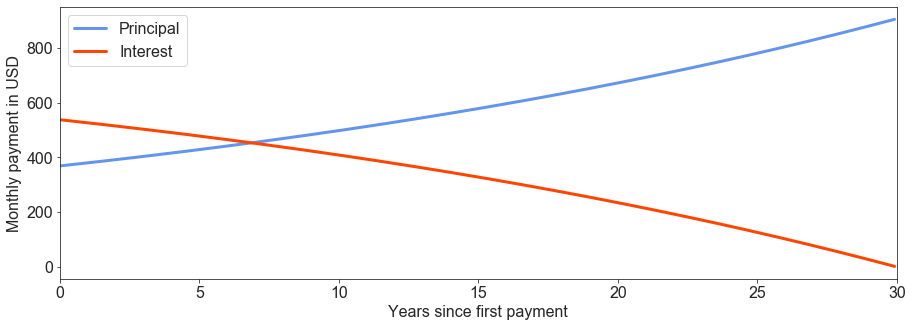

In [4]:
# Define an array with the years:
years = np.arange(360)/12.

plt.figure(figsize=(15,5))
plt.plot(years, principal, label = 'Principal', lw = 3, color = 'cornflowerblue')
plt.plot(years, interest, label = 'Interest', lw = 3, color = 'orangered')
plt.legend(fontsize=16)
plt.xlim(0,30)
plt.xlabel('Years since first payment', fontsize=16)
plt.ylabel('Monthly payment in USD', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

What this plot is basically telling us, is that in this case for the first $\sim$6 years of our mortgage payments, we will mostly be paying interests --- and very little to the principal. This is basically another reason (<a href="https://www.bankrate.com/mortgages/5-year-real-estate-rule/#:~:text=In%20real%20estate%2C%20this%20calls,property%20or%20risk%20losing%20money.&text=If%20you%20want%20to%20make,value%20must%20exceed%20those%20fees.">on top of the five-year rule</a>) for not jumping into a mortgage for less than about that time-frame; if you want to sell before that with a 30-year mortgage, the amount you still owe (and accrued interest) is still too large --- so selling the house might actually be pretty hard without losing money. 

To track this cummulative schedule, there's also an utility function. Let's use it and plot it:

In [5]:
cprincipal, cinterest = utils.return_cummulative_schedule(loan, downpayment, N, r)

Monthly payment is: 906.4486725183303 USD


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 7 Text yticklabel objects>)

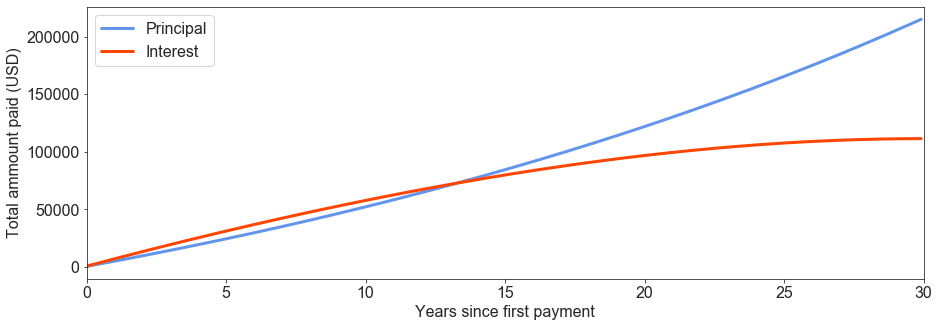

In [6]:
plt.figure(figsize=(15,5))
plt.plot(years, cprincipal, label = 'Principal', lw = 3, color = 'cornflowerblue')
plt.plot(years, cinterest, label = 'Interest', lw = 3, color = 'orangered')
plt.legend(fontsize=16)
plt.xlim(0,30)
plt.xlabel('Years since first payment', fontsize=16)
plt.ylabel('Total ammount paid (USD)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

This plot has a ton of information. First and foremost, the very last values of each line already tell us the costly of this mortgage: 

In [7]:
print('Total interest paid:', np.round(cinterest[-1],2),'USD')
print('Total principal paid:', np.round(cprincipal[-1],2),'USD')

Total interest paid: 111321.52 USD
Total principal paid: 215000.0 USD


The total interest paid in this mortgage is more than half the loan! That's a huge business for the lender. Moreover, this tell us that the total ammount to be paid for the loan (principal plus interests) is 111,300 + 215,000 = 326,300 USD. So, if we want to sell --- we better sell the house at a price larger than that if we don't want to lose money. Suppose you take the decision to sell at the 5-year mark. In this case, you would have paid:

In [8]:
idx = np.where(years==5)[0]
total_paid_at_5_years = cinterest[idx] + cprincipal[idx]
print('Payment breakdown at the 5-year mark:')
print('Paid in interests:',np.round(cinterest[idx][0],2),'USD')
print('Paid in principal:',np.round(cprincipal[idx][0],2),'USD')
print('Total paid:', np.round(total_paid_at_5_years[0],2),'USD')

Payment breakdown at the 5-year mark:
Paid in interests: 31013.47 USD
Paid in principal: 24279.9 USD
Total paid: 55293.37 USD


So you would have around 326,300 - 55,300 = 271,000 USD left to pay your loan (principal + interest). What's the price of the house after 5 years? It deppends on the house appreciation. The most basic model for this is one in which the house value increases at a steady rate each year at a rate $a$ (in percent). So the future price is just given by the classic compound interest formulae:

$F = P (1 + a)^y$,

where $F$ is the future price, $P$ is the present price and $y$ is the number of years. In reality, appreciation might fluctuate of course. Let's assume for now this is constant, and calculate the price for different annual rates after five years:

(0.1, 10)

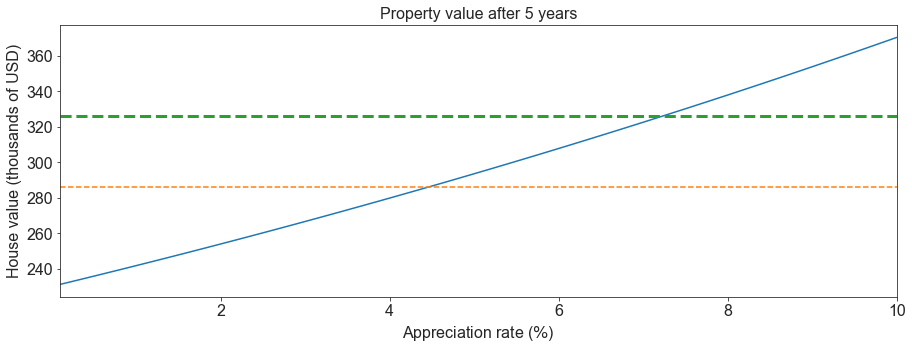

In [9]:
appreciation_rates = np.linspace(0.1,10.,100)
initial_price = 230000.
future_price = initial_price*(1 + (appreciation_rates/100.))**5 # using 5-year compound interest
plt.figure(figsize=(15,5))
plt.plot(appreciation_rates, future_price/1e3)
plt.xlabel(r'Appreciation rate ($\%$)',fontsize=16)
plt.ylabel('House value (thousands of USD)', fontsize=16)
plt.title('Property value after 5 years', fontsize=16)
plt.plot([0.1,10],[271. + 15.,271. + 15.],'--')
plt.plot([0.1,10],[271. + 15. + 40,271. + 15+ 40],'--', lw = 3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0.1,10)

The dashed orange line marks the money we have to give back to the the bank for our loan at selling (i.e., the 271,000 USD calculated above left to pay our 30-year loan) _plus_ the downpayment we provided to our lenders of 15,000 USD. This line marks the minimum amount of money we want to sell our house in order to _not lose our investment_. This plot basically tells us that if the house appreciation rate is below about 4.5\% we'll be _losing_ money selling the house after 5 years. We mention this is a minimum because these figures do not even consider extra costs like insurance, property tax, repairs/maintainence of the house --- and closing costs, all of which can easily total up to 40,000 USD in 5-years (green dashed line in the plot)! Considering those costs, we would really need above a 7\% steady appreciation rate over 5 years in order to not lose any money with this investment.


House appreciation has been stalled in the past few years (2019-2020) in Baltimore, MD, for instance --- but it is expected to jump in 2021, at least according to <a href="https://www.zillow.com/baltimore-md/home-values/">the median house values in Zillow</a>. There's mixed values on the appreciation rate though --- Zillow mentions a $7\%$ increase in prices in the past year, and an even larger one (11\%) predicted for 2021 --- but it is unclear to me if those reflect appreciation rates per se on a given/typical house.

### Same excercise, 15-year loan

Let's now suppose you have the money to get the same loan, but on 15 years instead of 30. How do these numbers change? Let's first do the first two graphs once again. First, let's change the number of payments $N$ --- and let's fix the rate at the same as above (typically, 15-year mortgages have lower rates!):

In [10]:
N = 180

In [11]:
principal, interest = utils.return_schedule(loan, downpayment, N, r)

Monthly payment is: 1484.7505265977036 USD


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 <a list of 10 Text yticklabel objects>)

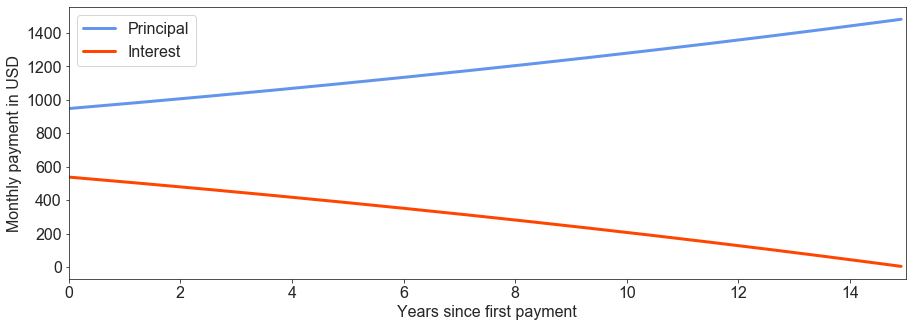

In [12]:
# Define an array with the years:
years = np.arange(180)/12.

plt.figure(figsize=(15,5))
plt.plot(years, principal, label = 'Principal', lw = 3, color = 'cornflowerblue')
plt.plot(years, interest, label = 'Interest', lw = 3, color = 'orangered')
plt.legend(fontsize=16)
plt.xlim(0,15)
plt.xlabel('Years since first payment', fontsize=16)
plt.ylabel('Monthly payment in USD', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

All right so, of course --- monthly payment is larger. However, note how most of the monthly payments go to the principal and not to the interest! This is like having travelled to the future in the 30-year loan. What about the cummulative schedule?

In [13]:
cprincipal, cinterest = utils.return_cummulative_schedule(loan, downpayment, N, r)

Monthly payment is: 1484.7505265977036 USD


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 7 Text yticklabel objects>)

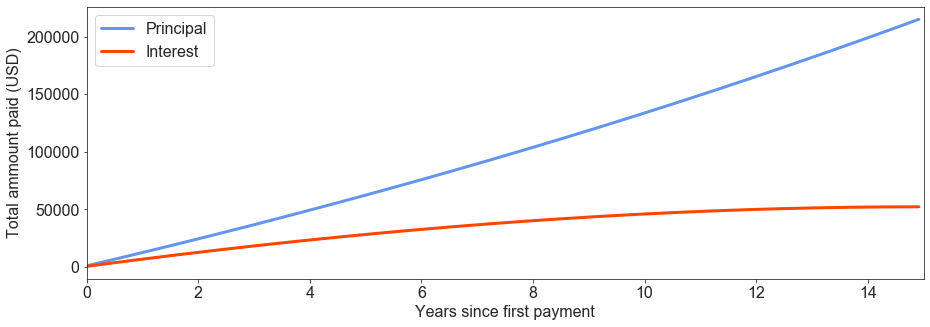

In [14]:
plt.figure(figsize=(15,5))
plt.plot(years, cprincipal, label = 'Principal', lw = 3, color = 'cornflowerblue')
plt.plot(years, cinterest, label = 'Interest', lw = 3, color = 'orangered')
plt.legend(fontsize=16)
plt.xlim(0,15)
plt.xlabel('Years since first payment', fontsize=16)
plt.ylabel('Total ammount paid (USD)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Already looks much nicer than the 30-year mortgage. Interest stalls at about 10 years. The most interesting figure is of course the total amount payed over 15 years:

In [15]:
print('Total interest paid:', np.round(cinterest[-1],2),'USD')
print('Total principal paid:', np.round(cprincipal[-1],2),'USD')

Total interest paid: 52255.09 USD
Total principal paid: 215000.0 USD


In this case, the interest paid is less than 1/4 of the total home value. So much better investment if one is able to handle the larger monthly payments. Total ammount paid to the loan is in this case 52,250 + 215,000 = 267,250 --- around 60,000 USD saved! Let's suppose once again we decide to sell after 5 years. What's the total payed amount breakdown in this case?

In [16]:
idx = np.where(years==5)[0]
total_paid_at_5_years = cinterest[idx] + cprincipal[idx]
print('Payment breakdown at the 5-year mark:')
print('Paid in interests:',np.round(cinterest[idx][0],2),'USD')
print('Paid in principal:',np.round(cprincipal[idx][0],2),'USD')
print('Total paid:', np.round(total_paid_at_5_years[0],2),'USD')

Payment breakdown at the 5-year mark:
Paid in interests: 28232.81 USD
Paid in principal: 62336.97 USD
Total paid: 90569.78 USD


As expected, _much_ more than in the 30-year loan. We would have around 267,250 - 90570 = 176,680 USD left to pay our loan (again, not considering possible extra fees). That is actually a pretty good number. We already invested 15,000 with our down-payment --- so to win money with this investment (and not considering any other costs, like, insurance, repairs, etc.), we would have to sell the house at a minimum price of 176,680 + 15,000 = 191,680 USD. This seems very doable, even in the case in which there were _no_ appreciation and we sold the house at the price we bought it (230,000 USD) --- that would give us a 40,000 USD return, not considering extra fees. Let's put these numbers in a plot similar to the one made for the 30-year mortgage calculation above:

(0.1, 10)

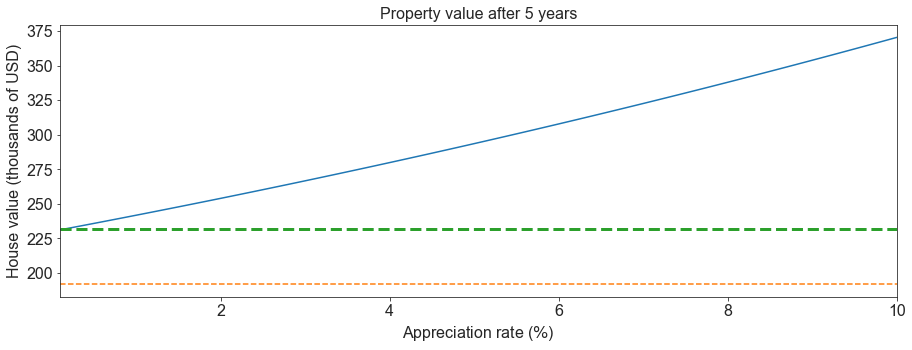

In [17]:
appreciation_rates = np.linspace(0.1,10.,100)
initial_price = 230000.
future_price = initial_price*(1 + (appreciation_rates/100.))**5 # using 5-year compound interest
plt.figure(figsize=(15,5))
plt.plot(appreciation_rates, future_price/1e3)
plt.xlabel(r'Appreciation rate ($\%$)',fontsize=16)
plt.ylabel('House value (thousands of USD)', fontsize=16)
plt.title('Property value after 5 years', fontsize=16)
plt.plot([0.1,10],[176.680 + 15.,176.680 + 15.],'--')
plt.plot([0.1,10],[176.680 + 15. + 40,176.680 + 15+ 40],'--', lw = 3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0.1,10)

The orange line marks our discussion above (i.e., a 40,000 USD return even with no appreciation). The green line, however, marks the same figure adding extra fees paid during the duration of those 5-years --- like property taxes, insurance and repairs. As an order of magnitude, annually between taxes, insurance and repairs, a value of 6,000 USD seems reasonable. This means around 30,000 USD paid in these extra fees --- so the return would be around 10,000 USD. At selling, one also has to consider the closing costs including real state agent fees (<a href="https://listwithclever.com/average-real-estate-commission-rate/maryland/">5\% of the property value</a>), so selling at the buying price would leave almost zero returns after 5-years (which is what the plot shows with the green line clashing with the blue line in the left-most part of the plot)! 

How much we get out of this investment, thus, seems like is up to the market at the end of the day. At a 2\% appreciation rate, we would see a return of about 20,000 USD. 

Whatever the market decides, however, it seems the 15-year mortgage is the smartest decision!